### Lab 5: SVM Implementation


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from svm_implementation import SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np


Importing Dataset

In [18]:
df = pd.read_csv('../data/tumor.csv')
df.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
# Drop the 'Unnamed: 32' column as it contains only NaN values
df.drop(columns=['Unnamed: 32'], inplace=True)

# Handle NaN values by filling them with the mean of each numeric column
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Drop any remaining rows with NaN values
df.dropna(inplace=True)

# Encode the diagnosis column
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Select most important features for better performance
important_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                     'smoothness_mean', 'compactness_mean', 'concavity_mean']

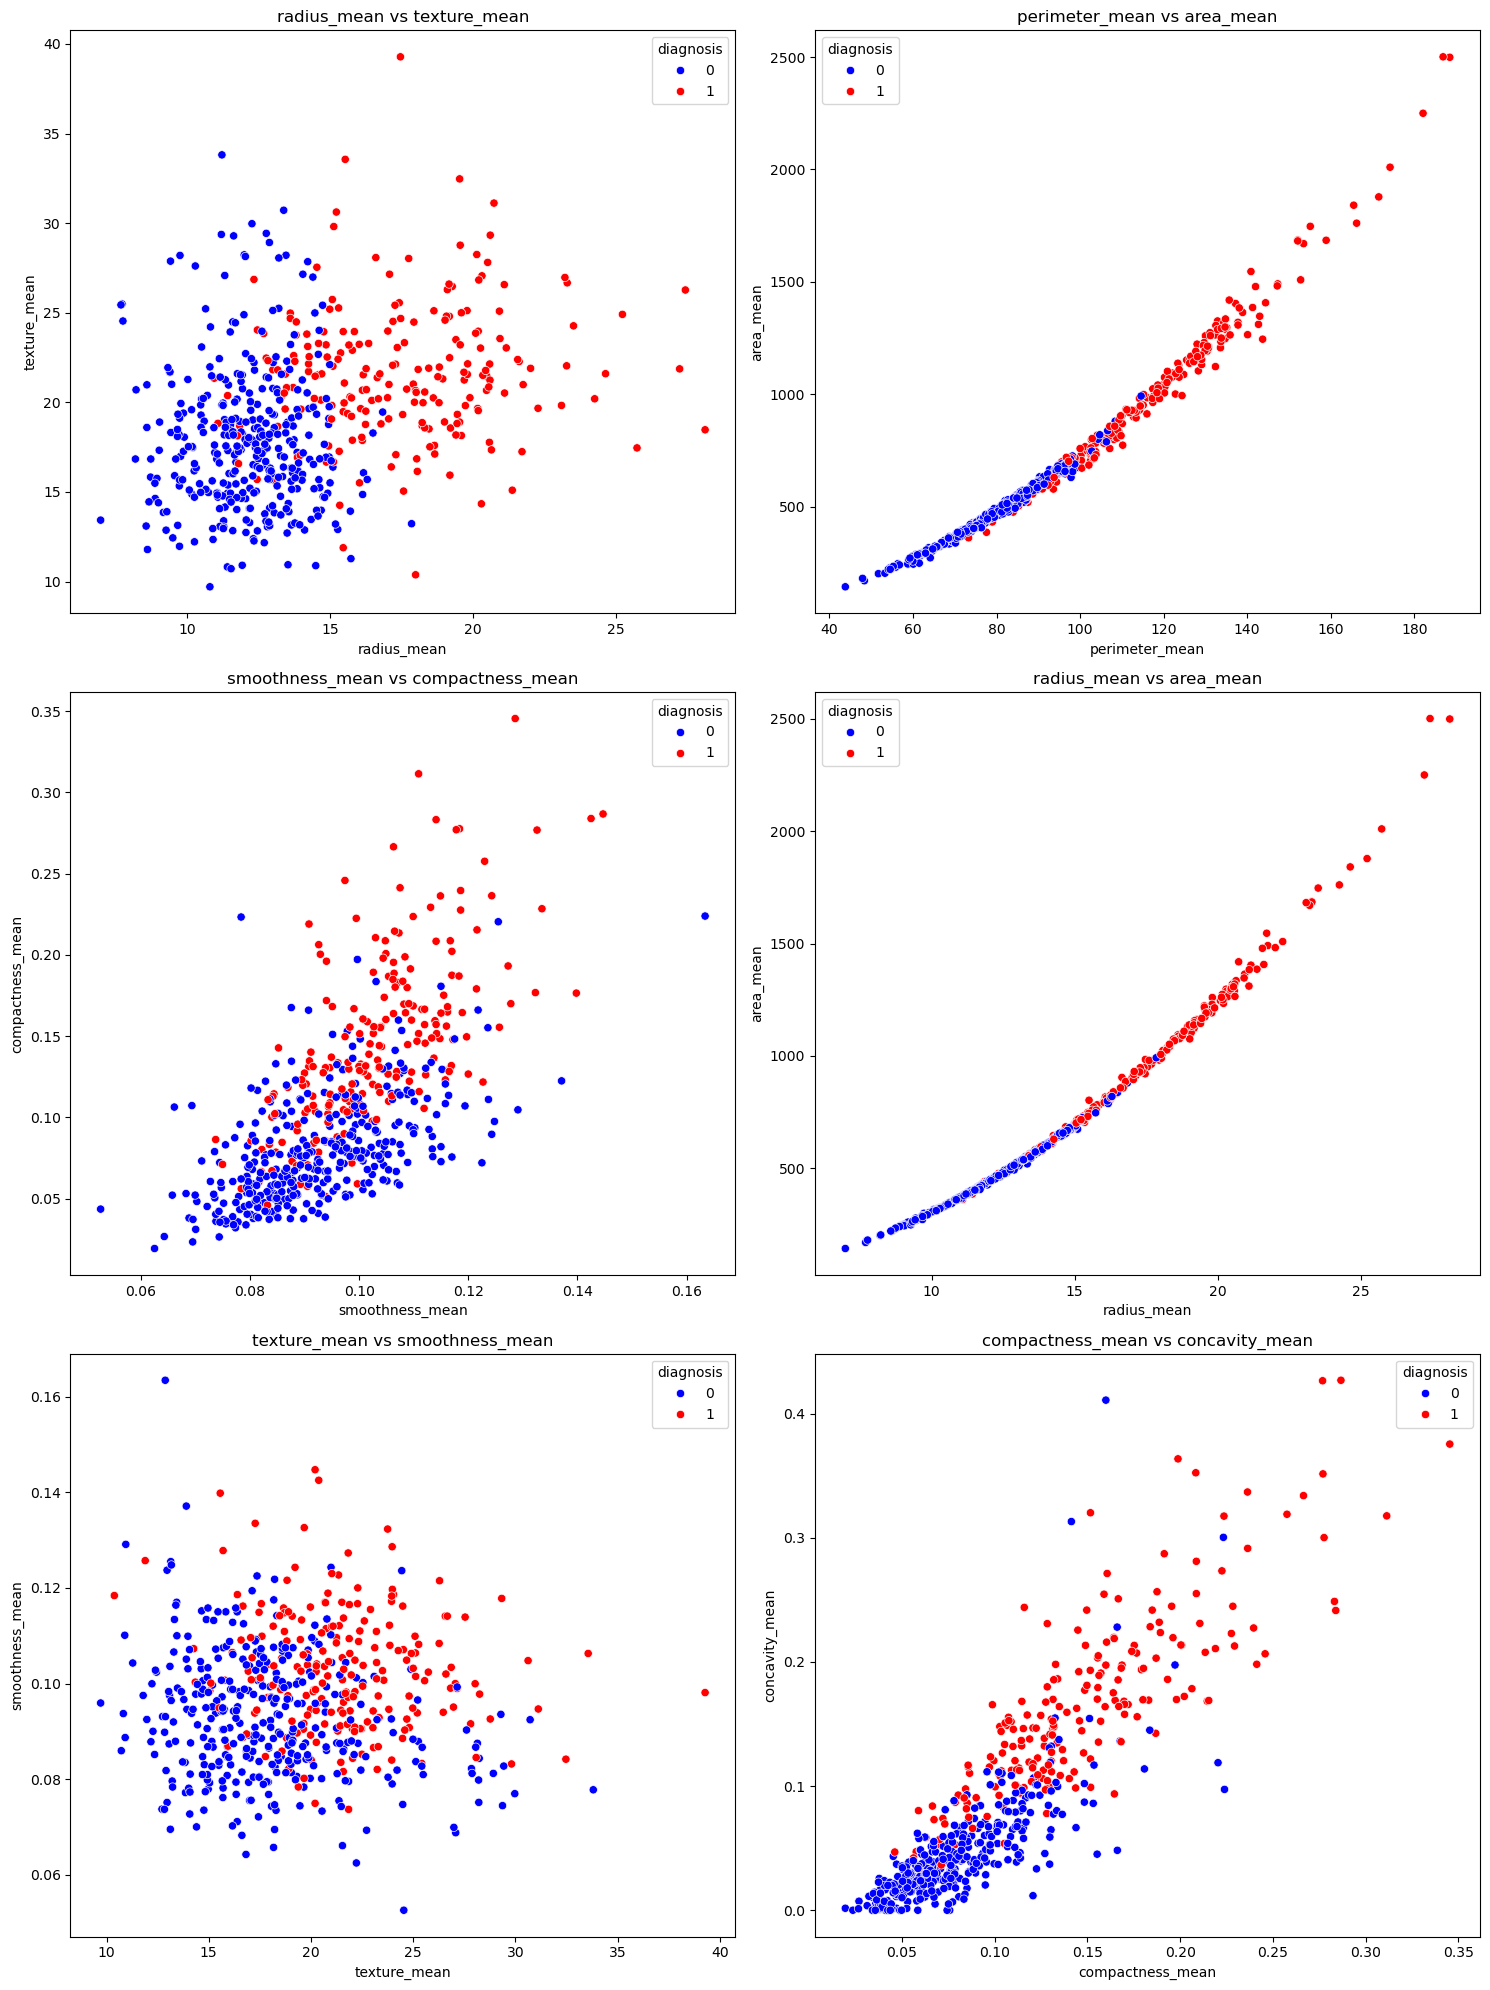

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots for each pair of features
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
axes = axes.ravel()

# Plot pairs of important features
feature_pairs = [
    ('radius_mean', 'texture_mean'),
    ('perimeter_mean', 'area_mean'),
    ('smoothness_mean', 'compactness_mean'),
    ('radius_mean', 'area_mean'),
    ('texture_mean', 'smoothness_mean'),
    ('compactness_mean', 'concavity_mean')
]

for idx, (feature1, feature2) in enumerate(feature_pairs):
    sns.scatterplot(
        data=df,
        x=feature1,
        y=feature2,
        hue='diagnosis',
        palette=['blue', 'red'],
        ax=axes[idx]
    )
    axes[idx].set_title(f'{feature1} vs {feature2}')

plt.tight_layout()
plt.show()


In [21]:

# Select features and target
X = df[important_features].values
y = df['diagnosis'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the full dataset for training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Dual Problem

In [22]:
feature_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                'smoothness_mean', 'compactness_mean', 'concavity_mean']

Linear Kernel

Custom implementation

In [23]:
model = SVM(kernel_type='linear', C=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)

report = classification_report(y_test, pred)
print(report)


Number of support vectors: 72
Support vectors per class: [37 35]
Objective value: -679.057555
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        71
           1       0.84      0.98      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



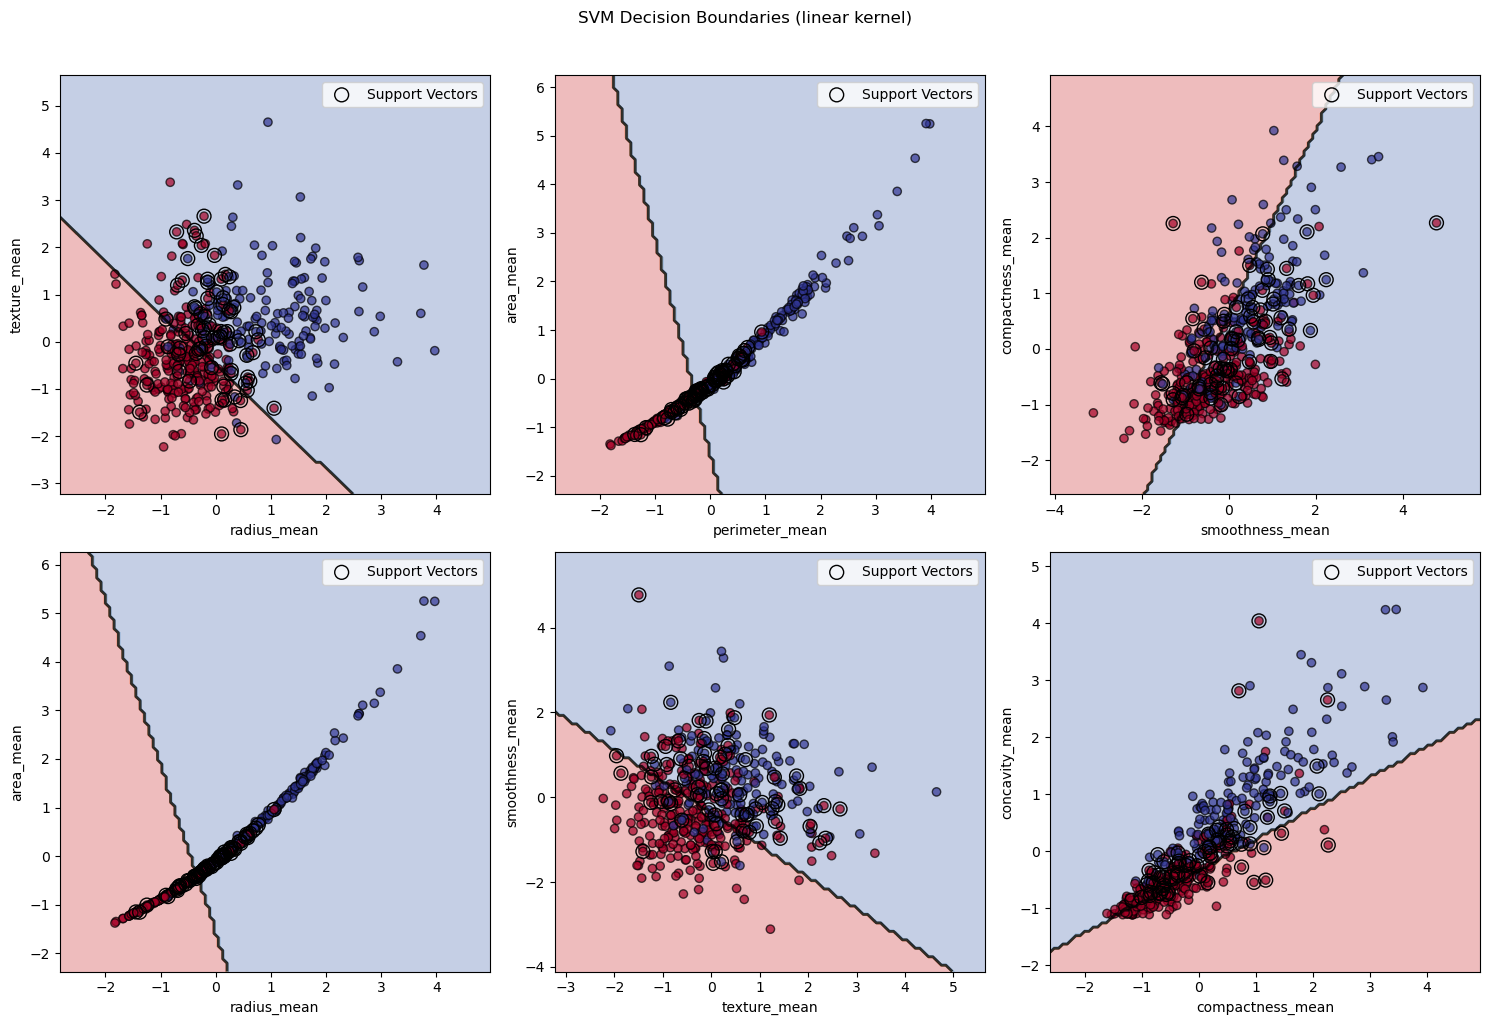

In [24]:
model.visualize(X_train,y_train,feature_names)

Reference

In [25]:
sm = SVC(kernel="linear",C=10)
sm.fit(X_train, y_train)

pred = sm.predict(X_test)

report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



RBF Kernel


Custom implementation

In [26]:
model = SVM(kernel_type='rbf', gamma=0.8, C=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)

report = classification_report(y_test, pred)
print(report)






Number of support vectors: 184
Support vectors per class: [88 96]
Objective value: -229.436558
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



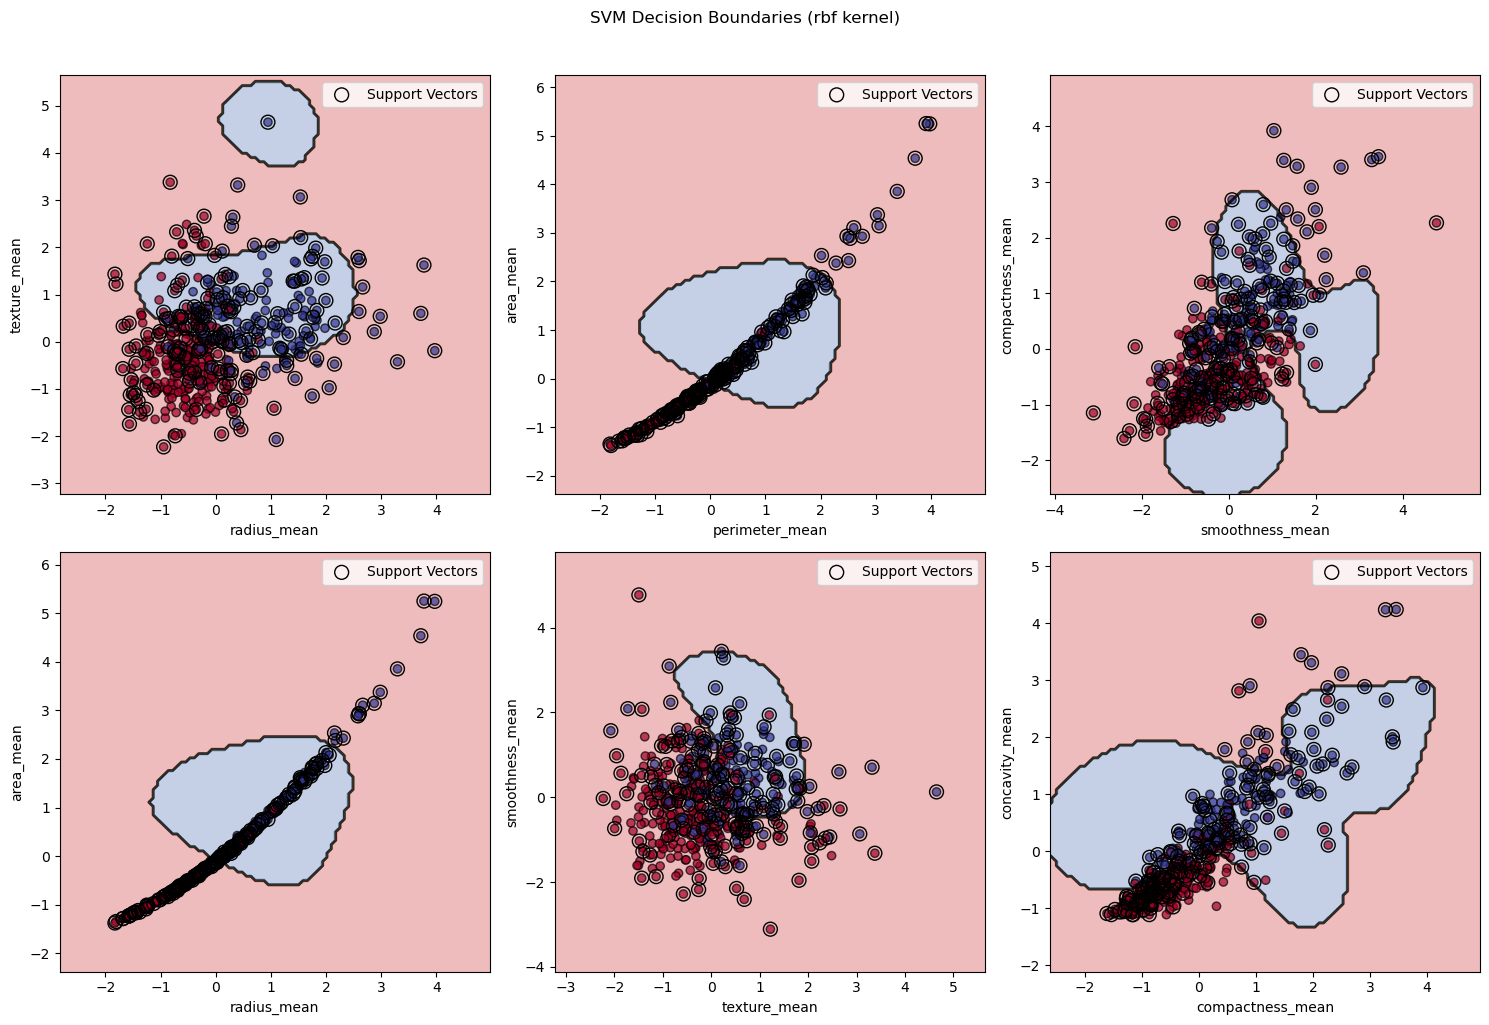

In [27]:
model.visualize(X_train,y_train,feature_names)

Reference

In [28]:
sm = SVC(kernel="rbf",C=10, gamma=0.8)
sm.fit(X_train, y_train)

pred = sm.predict(X_test)

report = classification_report(y_test, pred)
print(report)





              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Polynomial Kernel


Custom implementation

In [29]:
model = SVM(kernel_type='poly',C=10, degree=3)
model.fit(X_train,y_train)
pred = model.predict(X_test)

report = classification_report(y_test, pred)
print(report)






Number of support vectors: 61
Support vectors per class: [32 29]
Objective value: -361.975431
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



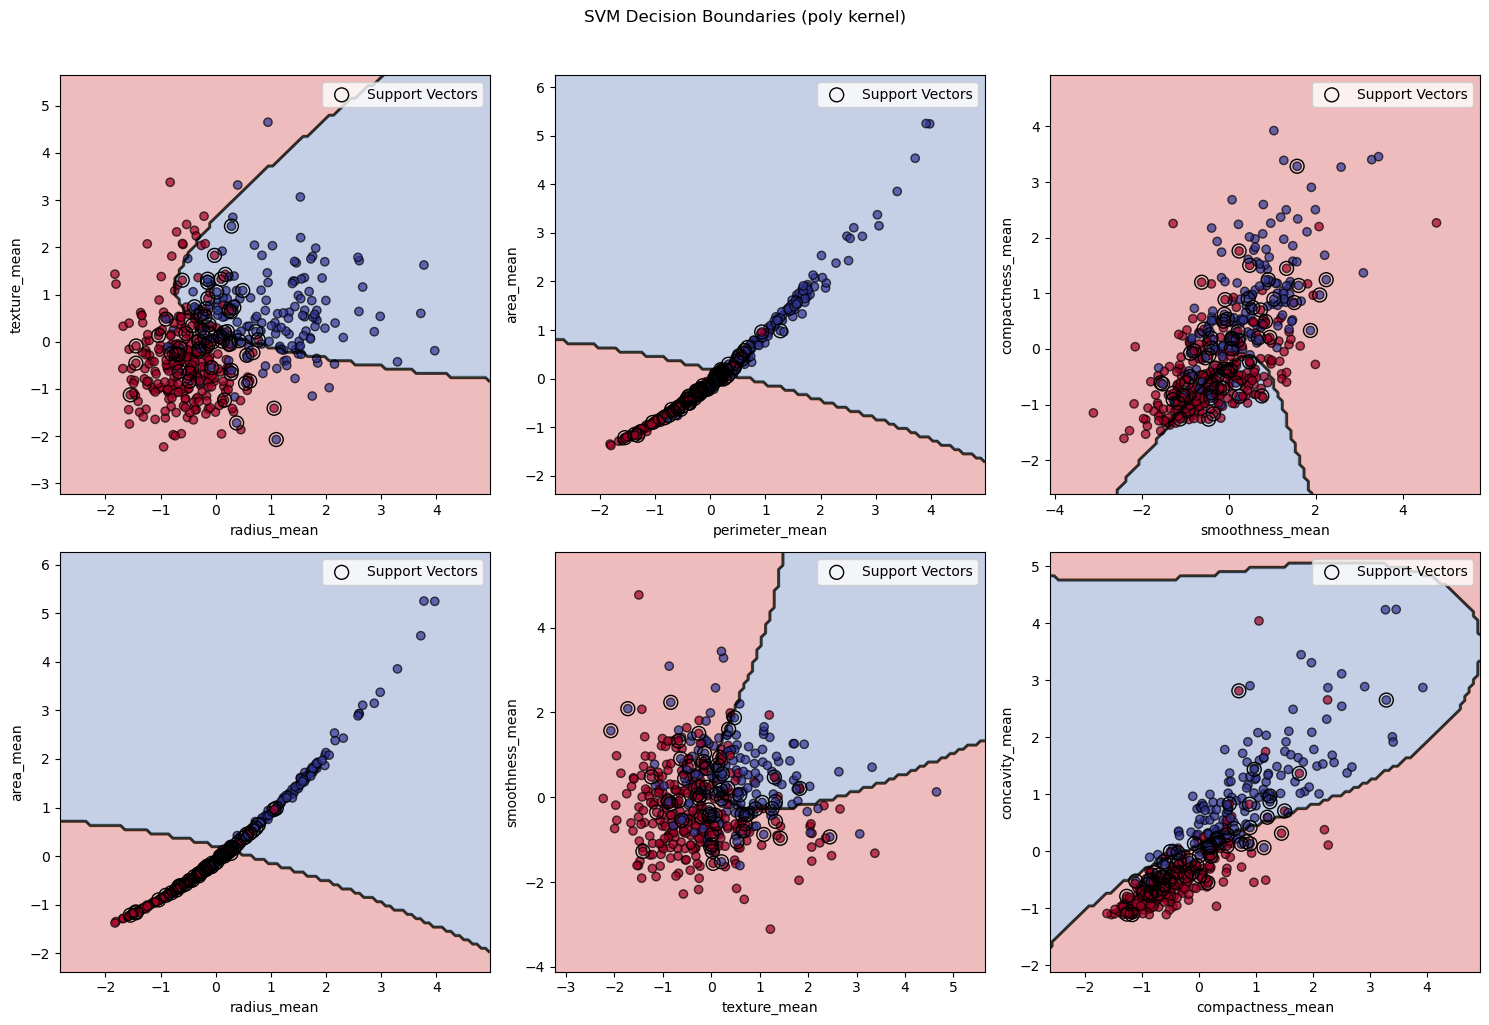

In [30]:
model.visualize(X_train,y_train,feature_names)

Reference

In [31]:
sm = SVC(kernel="poly",C=10, degree=3)
sm.fit(X_train, y_train)

pred = sm.predict(X_test)

report = classification_report(y_test, pred)
print(report)



              precision    recall  f1-score   support

           0       0.88      0.99      0.93        71
           1       0.97      0.77      0.86        43

    accuracy                           0.90       114
   macro avg       0.92      0.88      0.89       114
weighted avg       0.91      0.90      0.90       114



Number of support vectors: 76
Support vectors per class: [38 38]
Objective value: -71.416576
Number of support vectors: 86
Support vectors per class: [40 46]
Objective value: -432.509259


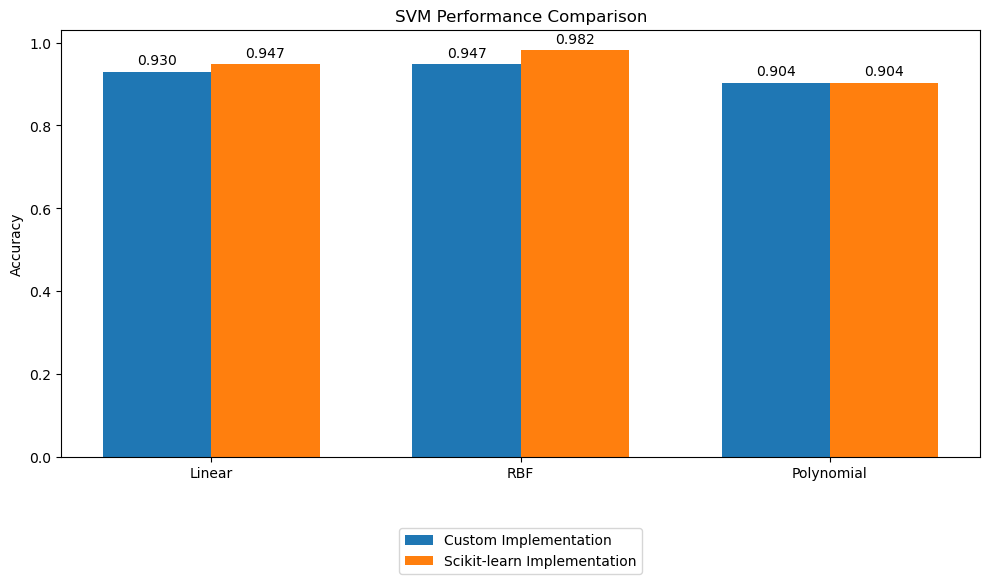

In [32]:
from sklearn.metrics import accuracy_score
# Collect accuracy scores for all implementations
implementations = ['Linear', 'RBF', 'Polynomial']
custom_scores = []
reference_scores = []

# Linear kernel scores
model_linear = SVM(kernel_type='linear', C=1.0)
model_linear.fit(X_train, y_train)
custom_scores.append(accuracy_score(y_test, model_linear.predict(X_test)))

sm_linear = SVC(kernel='linear', C=1.0)
sm_linear.fit(X_train, y_train)
reference_scores.append(accuracy_score(y_test, sm_linear.predict(X_test)))

# RBF kernel scores
model_rbf = SVM(kernel_type='rbf', C=10)
model_rbf.fit(X_train, y_train)
custom_scores.append(accuracy_score(y_test, model_rbf.predict(X_test)))

sm_rbf = SVC(kernel='rbf', C=10)
sm_rbf.fit(X_train, y_train)
reference_scores.append(accuracy_score(y_test, sm_rbf.predict(X_test)))

# Polynomial kernel scores (already computed above)
custom_scores.append(accuracy_score(y_test, pred))
reference_scores.append(accuracy_score(y_test, sm.predict(X_test)))

# Create bar chart
x = np.arange(len(implementations))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
custom_bars = ax.bar(x - width/2, custom_scores, width, label='Custom Implementation')
reference_bars = ax.bar(x + width/2, reference_scores, width, label='Scikit-learn Implementation')

ax.set_ylabel('Accuracy')
ax.set_title('SVM Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(implementations)
ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center')

# Add value labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(custom_bars)
autolabel(reference_bars)

plt.tight_layout()
plt.show()
